# Do time cells necessitate tones?
Compare tuning to elapsed time and distance travelled in regular linear tracks vs SeqLT task
### TODO:
- Plot timecourse (LT1, LT2, LT3, toneLT1, toneLT2, toneLT3, seqLT1, seqLT2, etc), average for all animals
- Normalize per animal!
- Plot example tuning curves
- Information content (AMI distribution) vs specific cell tuning (portion time cells, portion place cells, etc over time)


In [1]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('plot_style.mplstyle')

import yaml
import numpy as np
np.random.seed(42)
import pingouin as pg
import pandas as pd
import h5py
import os
from functions.signal_processing import smooth_1D

# Params
with open('params.yaml','r') as file:
    params = yaml.full_load(file)

In [2]:
LT_time_tuning_curves = []
LT_time_AMI = np.zeros(0)
LT_time_pvalue = np.zeros(0)
LT_distance_tuning_curves = []
LT_distance_AMI = np.zeros(0)
LT_distance_pvalue = np.zeros(0)
LT_spatial_tuning_curves = []
LT_spatial_AMI = np.zeros(0)
LT_spatial_pvalue = np.zeros(0)
seqLT_time_tuning_curves = []
seqLT_time_AMI = np.zeros(0)
seqLT_time_pvalue = np.zeros(0)
seqLT_distance_tuning_curves = []
seqLT_distance_AMI = np.zeros(0)
seqLT_distance_pvalue = np.zeros(0)
seqLT_spatial_tuning_curves = []
seqLT_spatial_AMI = np.zeros(0)
seqLT_spatial_pvalue = np.zeros(0)
seqLT_tone_tuning_curves = []
seqLT_tone_AMI = np.zeros(0)
seqLT_tone_pvalue = np.zeros(0)

# Load all time, distance, place, tone tuning data
sessionList=os.listdir(os.path.join(params['path_to_results'],'tuning_data'))
for session in sessionList:
    # Open info.yaml
    if os.path.exists(os.path.join(params['path_to_results'],'tuning_data',session,'info.yaml')): # TODO: Report any file missing
        with open(os.path.join(params['path_to_results'],'tuning_data',session,'info.yaml'),'r') as file:
            session_info = yaml.full_load(file)
        # If task is legoLT or legoSeqLT
        if session_info['task']=='legoLT':
            with h5py.File(os.path.join(params['path_to_results'],'tuning_data',session,'temporal_tuning.h5'), 'r') as f:
                LT_time_tuning_curves.append(f['tuning_curves'][:])
                LT_time_AMI = np.append(LT_time_AMI,f['AMI'][:])
                LT_time_pvalue = np.append(LT_time_pvalue,f['p_value'][:])
            with h5py.File(os.path.join(params['path_to_results'],'tuning_data',session,'distance_tuning.h5'), 'r') as f:
                LT_distance_tuning_curves.append(f['tuning_curves'][:])
                LT_distance_AMI = np.append(LT_distance_AMI,f['AMI'][:])
                LT_distance_pvalue = np.append(LT_distance_pvalue,f['p_value'][:])
            with h5py.File(os.path.join(params['path_to_results'],'tuning_data',session,'spatial_tuning.h5'), 'r') as f:
                LT_spatial_tuning_curves.append(f['tuning_curves'][:])
                LT_spatial_AMI = np.append(LT_spatial_AMI,f['AMI'][:])
                LT_spatial_pvalue = np.append(LT_spatial_pvalue,f['p_value'][:])
        elif session_info['task']=='legoSeqLT':
            with h5py.File(os.path.join(params['path_to_results'],'tuning_data',session,'temporal_tuning.h5'), 'r') as f:
                seqLT_time_tuning_curves.append(f['tuning_curves'][:])
                seqLT_time_AMI = np.append(seqLT_time_AMI,f['AMI'][:])
                seqLT_time_pvalue = np.append(seqLT_time_pvalue,f['p_value'][:])
            with h5py.File(os.path.join(params['path_to_results'],'tuning_data',session,'distance_tuning.h5'), 'r') as f:
                seqLT_distance_tuning_curves.append(f['tuning_curves'][:])
                seqLT_distance_AMI = np.append(seqLT_distance_AMI,f['AMI'][:])
                seqLT_distance_pvalue = np.append(seqLT_distance_pvalue,f['p_value'][:])
            with h5py.File(os.path.join(params['path_to_results'],'tuning_data',session,'spatial_tuning.h5'), 'r') as f:
                seqLT_spatial_tuning_curves.append(f['tuning_curves'][:])
                seqLT_spatial_AMI = np.append(seqLT_spatial_AMI,f['AMI'][:])
                seqLT_spatial_pvalue = np.append(seqLT_spatial_pvalue,f['p_value'][:])
            try: #TODO simplify, optimize
                with h5py.File(os.path.join(params['path_to_results'],'tuning_data',session,'seqTone_tuning.h5'), 'r') as f:
                    seqLT_tone_tuning_curves.append(f['tuning_curves'][:])
                    seqLT_tone_AMI = np.append(seqLT_distance_AMI,f['AMI'][:])
                    seqLT_tone_pvalue = np.append(seqLT_distance_pvalue,f['p_value'][:])
            except:
                print('Could not find seqTone_tuning.h5')

In [24]:
real_LT_time_cells = LT_time_AMI[np.logical_and(LT_time_AMI>LT_distance_AMI,LT_time_AMI>LT_spatial_AMI)]
real_seqLT_time_cells = seqLT_time_AMI[np.logical_and(seqLT_time_AMI>seqLT_distance_AMI,seqLT_time_AMI>seqLT_spatial_AMI)]

In [3]:
p_val_threshold=.05

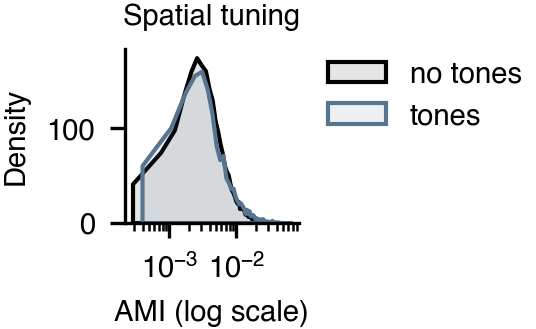

In [11]:
# Temporal coding with or without tones
plt.figure(figsize=(.75,.75))
sns.histplot(LT_spatial_AMI[LT_spatial_pvalue<p_val_threshold],
             bins=100,
             stat='density',
             cumulative=True,
             element='poly',
             alpha=.1,
             color='k',
             label='no tones')
sns.histplot(seqLT_spatial_AMI[seqLT_spatial_pvalue<p_val_threshold],
             bins=100,
             stat='density',
             cumulative=True,
             element='poly',
             alpha=.1,
             color='C0',
             label='tones')
plt.xscale('log')
plt.title('Spatial tuning')
plt.xlabel('AMI (log scale)')
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.savefig(os.path.join(params['path_to_results'],'figures', 'cum_dens_elapsed_spatial_noTone_vs_tone.pdf'))

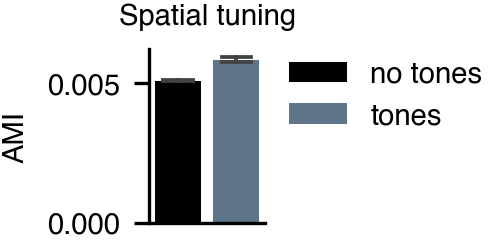

In [5]:
# Temporal coding with or without tones
plt.figure(figsize=(.5,.75))
sns.barplot([LT_spatial_AMI[LT_spatial_pvalue<p_val_threshold],seqLT_spatial_AMI[seqLT_spatial_pvalue<p_val_threshold]],
             label=['no tones','tones'],
             errorbar='se',
             capsize=.5,
             palette=['k', 'C0']
             )
plt.title('Spatial tuning')
plt.ylabel('AMI')
plt.xticks([])
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.savefig(os.path.join(params['path_to_results'],'figures', 'bar_elapsed_spatial_noTone_vs_tone.pdf'))

In [10]:
pg.ttest(x=LT_spatial_AMI[LT_spatial_pvalue<p_val_threshold],
         y=seqLT_spatial_AMI[seqLT_spatial_pvalue<p_val_threshold])

/Users/guillaumeetter/.pyenv/versions/3.10.9/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: overflow encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/guillaumeetter/.pyenv/versions/3.10.9/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: overflow encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-8.735033,6180.63843,two-sided,3.095544e-18,"[-0.0, -0.0]",0.168393,6.031e+14,1.0


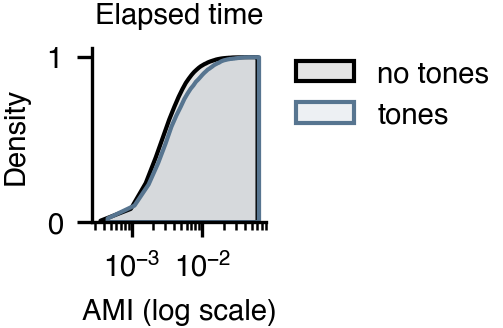

In [6]:
# Temporal coding with or without tones
plt.figure(figsize=(.75,.75))
sns.histplot(LT_time_AMI[LT_time_pvalue<p_val_threshold],
             bins=100,
             stat='density',
             cumulative=True,
             element='poly',
             alpha=.1,
             color='k',
             label='no tones')
sns.histplot(seqLT_time_AMI[seqLT_time_pvalue<p_val_threshold],
             bins=100,
             stat='density',
             cumulative=True,
             element='poly',
             alpha=.1,
             color='C0',
             label='tones')
plt.xscale('log')
plt.title('Elapsed time')
plt.xlabel('AMI (log scale)')
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.savefig(os.path.join(params['path_to_results'],'figures', 'cum_dens_elapsed_time_noTone_vs_tone.pdf'))

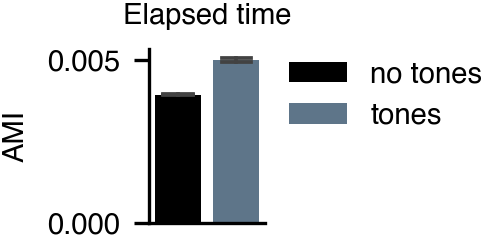

In [7]:
# Temporal coding with or without tones
plt.figure(figsize=(.5,.75))
sns.barplot([LT_time_AMI[LT_time_pvalue<p_val_threshold],seqLT_time_AMI[seqLT_time_pvalue<p_val_threshold]],
             label=['no tones','tones'],
             errorbar='se',
             capsize=.5,
             palette=['k', 'C0']
             )
plt.title('Elapsed time')
plt.ylabel('AMI')
plt.xticks([])
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.savefig(os.path.join(params['path_to_results'],'figures', 'bar_elapsed_time_noTone_vs_tone.pdf'))

In [9]:
pg.ttest(x=LT_time_AMI[LT_time_pvalue<p_val_threshold],
         y=seqLT_time_AMI[seqLT_time_pvalue<p_val_threshold])


/Users/guillaumeetter/.pyenv/versions/3.10.9/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: overflow encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/guillaumeetter/.pyenv/versions/3.10.9/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: overflow encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-13.235468,5431.855474,two-sided,2.217182e-39,"[-0.0, -0.0]",0.278861,1.341e+36,1.0


In [ ]:
print(f'n = {len(LT_time_AMI[LT_time_pvalue<p_val_threshold])} neurons')

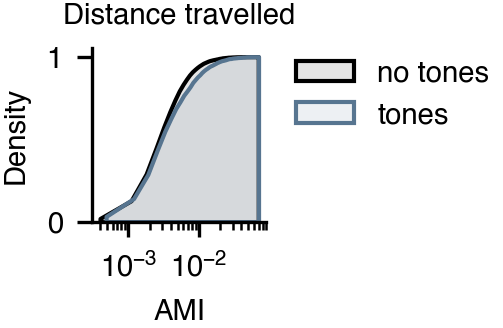

In [53]:
# Distance coding with or without tones
plt.figure(figsize=(.75,.75))
sns.histplot(LT_distance_AMI[LT_distance_pvalue<p_val_threshold],
             bins=100,
             stat='density',
             cumulative=True,
             element='poly',
             alpha=.1,
             color='k',
             label='no tones')
sns.histplot(seqLT_distance_AMI[seqLT_distance_pvalue<p_val_threshold],
             bins=100,
             stat='density',
             cumulative=True,
             element='poly',
             alpha=.1,
             color='C0',
             label='tones')
plt.xscale('log')
plt.title('Distance travelled')
plt.xlabel('AMI')
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.savefig(os.path.join(params['path_to_results'],'figures', 'cum_dens_distance_travelled_noTone_vs_tone.pdf'))

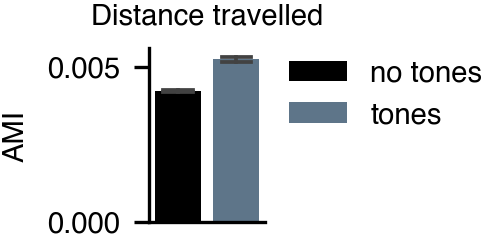

In [54]:
plt.figure(figsize=(.5,.75))
sns.barplot([LT_distance_AMI[LT_distance_pvalue<p_val_threshold],seqLT_distance_AMI[seqLT_distance_pvalue<p_val_threshold]],
             label=['no tones','tones'],
             errorbar='se',
             capsize=.5,
             palette=['k', 'C0']
             )
plt.title('Distance travelled')
plt.ylabel('AMI')
plt.xticks([])
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.savefig(os.path.join(params['path_to_results'],'figures', 'bar_distance_travelled_noTone_vs_tone.pdf'))

In [57]:
pg.ttest(x=LT_distance_AMI[LT_distance_pvalue<p_val_threshold],
         y=seqLT_distance_AMI[seqLT_distance_pvalue<p_val_threshold])

/Users/guillaumeetter/.pyenv/versions/3.10.9/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: overflow encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/guillaumeetter/.pyenv/versions/3.10.9/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: overflow encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-11.122182,5096.711449,two-sided,2.072738e-28,"[-0.0, -0.0]",0.243874,1.107e+25,1.0


In [58]:
print(f'n = {len(LT_distance_AMI[LT_distance_pvalue<p_val_threshold])} neurons')

n = 17134 neurons


Plot tuning curves in each conditions

In [90]:
# Pool data
pooled_LT_time_tuning_curves = np.zeros((0,LT_time_tuning_curves[0].shape[1]))
pooled_seqLT_time_tuning_curves = np.zeros((0,seqLT_time_tuning_curves[0].shape[1]))
pooled_LT_distance_tuning_curves = np.zeros((0,LT_distance_tuning_curves[0].shape[1]))
pooled_seqLT_distance_tuning_curves = np.zeros((0,seqLT_distance_tuning_curves[0].shape[1]))

for i in range(len(LT_time_tuning_curves)):
    pooled_LT_time_tuning_curves = np.append(pooled_LT_time_tuning_curves,LT_time_tuning_curves[i],axis=0)

for i in range(len(seqLT_time_tuning_curves)):
    pooled_seqLT_time_tuning_curves = np.append(pooled_seqLT_time_tuning_curves,seqLT_time_tuning_curves[i],axis=0)

for i in range(len(LT_distance_tuning_curves)):
    pooled_LT_distance_tuning_curves = np.append(pooled_LT_distance_tuning_curves,LT_distance_tuning_curves[i],axis=0)

for i in range(len(seqLT_distance_tuning_curves)):
    pooled_seqLT_distance_tuning_curves = np.append(pooled_seqLT_distance_tuning_curves,seqLT_distance_tuning_curves[i],axis=0)

# Smooth data

# Plot data

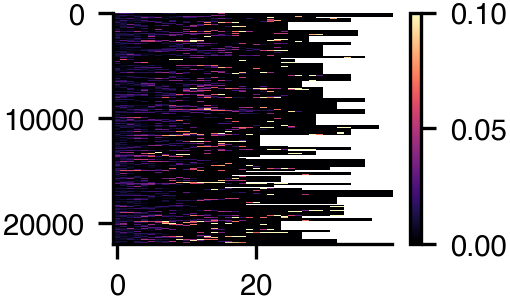

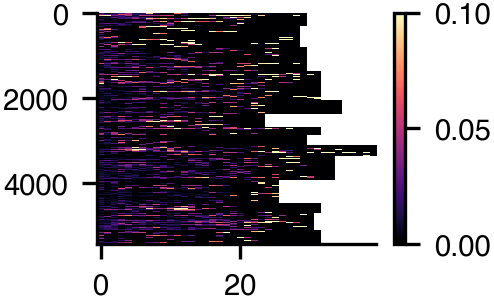

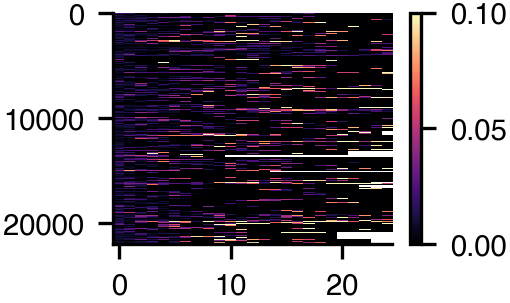

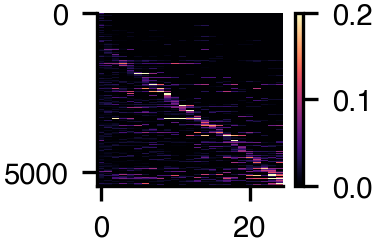

In [104]:
plt.figure()
plt.imshow(pooled_LT_time_tuning_curves,aspect='auto',interpolation='none',vmin=0,vmax=.1,cmap='magma')
plt.colorbar()

plt.figure()
plt.imshow(pooled_seqLT_time_tuning_curves,aspect='auto',interpolation='none',vmin=0,vmax=.1,cmap='magma')
plt.colorbar()

plt.figure()
plt.imshow(pooled_LT_distance_tuning_curves,aspect='auto',interpolation='none',vmin=0,vmax=.1,cmap='magma')
plt.colorbar()

idx=np.argsort(np.argmax(pooled_seqLT_distance_tuning_curves,axis=1))
plt.figure(figsize=(1,.75))
plt.imshow(pooled_seqLT_distance_tuning_curves[idx,:],aspect='auto',interpolation='none',vmin=0,vmax=.2,cmap='magma')
plt.colorbar()


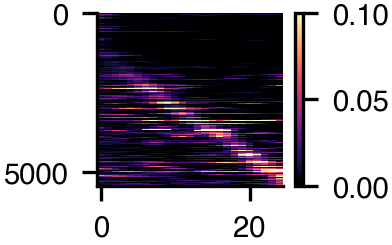

In [126]:
smoothed_seqLT_distance_tuning_curves = np.zeros(pooled_seqLT_distance_tuning_curves.shape)
params['smoothing_sigma']=1
for cell_i in range(len(pooled_seqLT_distance_tuning_curves)):
    smoothed_seqLT_distance_tuning_curves[cell_i,:] = smooth_1D(pooled_seqLT_distance_tuning_curves[cell_i,:],params)

idx=np.argsort(np.argmax(smoothed_seqLT_distance_tuning_curves,axis=1))
plt.figure(figsize=(1,.75))
plt.imshow(smoothed_seqLT_distance_tuning_curves[idx,:],aspect='auto',interpolation='none',vmin=0,vmax=.1,cmap='magma')
plt.colorbar()

In [ ]:
# Using p-value threshold of .05, exclude tuning curves and AMI above threshold

# Plot sorted time and distance tuning curves 



